# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

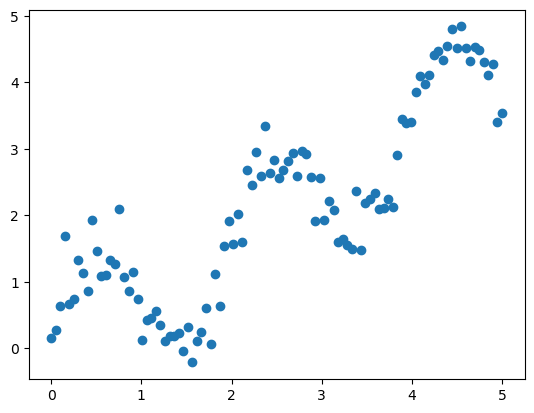

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.6056636625683509


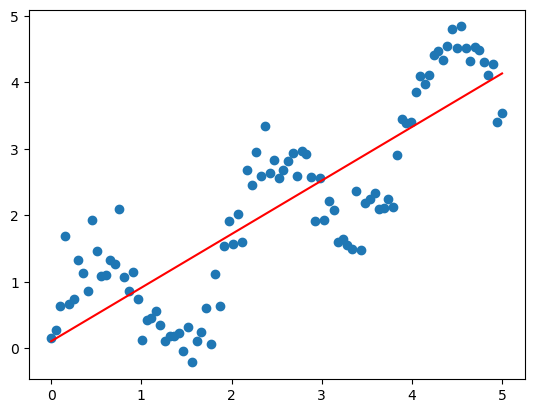

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [11]:
print(x.shape)

(100,)


In [8]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [9]:
regr_poly = LinearRegression()

In [10]:
regr_poly.fit(X_poly, y)

LinearRegression()

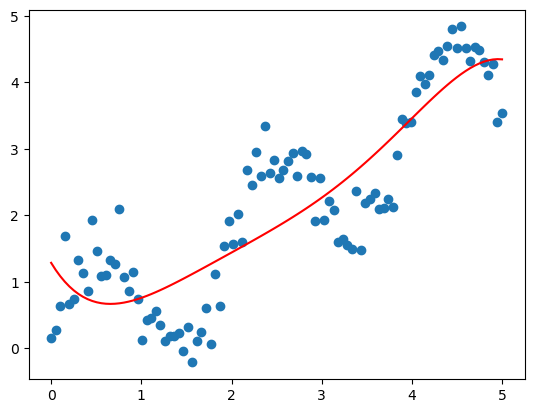

In [11]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [12]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-2.2490637   2.64379831 -1.14048645  0.23663839 -0.01828054]
interception:  1.2846843991976744


In [13]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.2846844 , 1.17769363, 1.08333007, 1.00076672, 0.92921205,
       0.86790934, 0.81613594, 0.77320255, 0.73845249, 0.71126098,
       0.69103444, 0.67720973, 0.66925349, 0.66666135, 0.66895725,
       0.67569273, 0.68644616, 0.70082206, 0.71845039, 0.73898577,
       0.76210683, 0.78751543, 0.81493599, 0.84411471, 0.87481891,
       0.90683629, 0.93997417, 0.97405882, 1.00893472, 1.04446384,
       1.08052491, 1.1170127 , 1.15383734, 1.19092352, 1.22820986,
       1.26564811, 1.30320247, 1.34084887, 1.37857424, 1.41637578,
       1.45426027, 1.49224332, 1.53034863, 1.56860735, 1.60705726,
       1.64574211, 1.6847109 , 1.72401712, 1.76371807, 1.80387412,
       1.84454797, 1.88580398, 1.92770741, 1.97032369, 2.01371774,
       2.05795322, 2.10309181, 2.1491925 , 2.19631088, 2.24449837,
       2.29380156, 2.34426144, 2.39591273, 2.4487831 , 2.5028925 ,
       2.55825241, 2.61486512, 2.67272303, 2.73180792, 2.7920902 ,
       2.85352823, 2.9160676 , 2.97964035, 3.04416434, 3.10954

In [17]:
Y_poly = regr_poly.predict(X_poly)
mse = np.sum((Y_poly - y)**2) / len(y)
print(Y_poly)
print('mse = ', mse)

[1.2846844  1.17769363 1.08333007 1.00076672 0.92921205 0.86790934
 0.81613594 0.77320255 0.73845249 0.71126098 0.69103444 0.67720973
 0.66925349 0.66666135 0.66895725 0.67569273 0.68644616 0.70082206
 0.71845039 0.73898577 0.76210683 0.78751543 0.81493599 0.84411471
 0.87481891 0.90683629 0.93997417 0.97405882 1.00893472 1.04446384
 1.08052491 1.1170127  1.15383734 1.19092352 1.22820986 1.26564811
 1.30320247 1.34084887 1.37857424 1.41637578 1.45426027 1.49224332
 1.53034863 1.56860735 1.60705726 1.64574211 1.6847109  1.72401712
 1.76371807 1.80387412 1.84454797 1.88580398 1.92770741 1.97032369
 2.01371774 2.05795322 2.10309181 2.1491925  2.19631088 2.24449837
 2.29380156 2.34426144 2.39591273 2.4487831  2.5028925  2.55825241
 2.61486512 2.67272303 2.73180792 2.7920902  2.85352823 2.9160676
 2.97964035 3.04416434 3.10954244 3.17566188 3.24239348 3.30959095
 3.37709018 3.4447085  3.51224395 3.5794746  3.64615779 3.71202942
 3.77680324 3.84017013 3.90179734 3.96132784 4.01837952 4.07254

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [18]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [19]:
sigma = 0.3

In [21]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])

X_rbf.shape

(100, 5)

In [22]:
regr_rbf = LinearRegression()

In [23]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

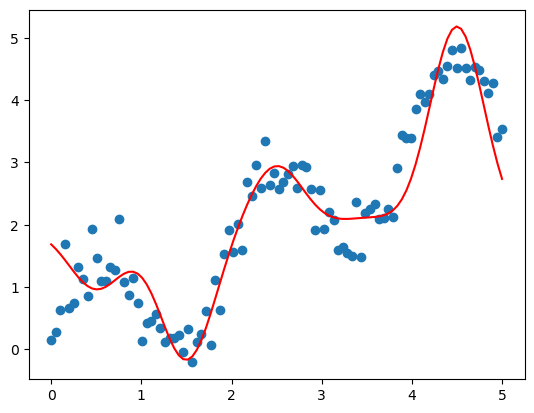

In [24]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [25]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.95326062 -2.09500475  1.02843265  0.17667495  3.26369364]
interception:  1.9214672217362947


In [33]:
Y_rbf = regr_rbf.predict(X_rbf)
mse_rbf = np.sum((Y_rbf - y)**2) / len(y)
print(mse_rbf)

0.2310057406549258


#### Comparison

In [27]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

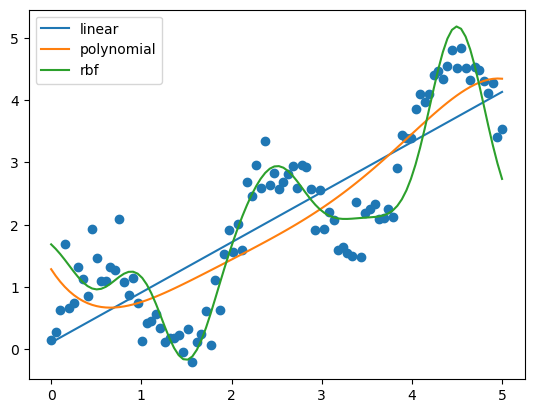

In [28]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [34]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.6056636625683509


In [35]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5036571218696291


In [36]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2310057406549258
